In [ ]:
#TODO make into python script

In [5]:
import pandas as pd
import numpy as np
import json

def create_design_matrix(event_file, json_file):
    # Load the event file into a DataFrame
    event_data = pd.read_csv(event_file,sep='\t')

    # Load the JSON file with event descriptions
    with open(json_file, 'r') as f:
        event_description = json.load(f)

    # Initialize an empty DataFrame for the design matrix
    n_trials = event_data.shape[0]
    design_matrix = pd.DataFrame(index=range(n_trials))

    # Loop over each key in the JSON file to create design matrix columns
    for key, value in event_description.items():
        # Check if the key has "Levels" (categorical variable)
        if 'Levels' in value:
            # Get all possible levels
            levels = value['Levels']
            # Create a column for each level
            for level_key, level_desc in levels.items():
                # Create boolean values: 1 if the event matches the level, else 0
                design_matrix[f"{key}_{level_desc.replace(' ', '_')}"] = (event_data[key] == int(level_key)).astype(int)
        else:
            # If no levels, just copy the values from the event file as-is
            design_matrix[key] = event_data[key]

    # Return the design matrix
    return design_matrix

# Usage example:
event_file = '/Users/sinakling/disks/meso_shared/RetinoMaps/sub-01/ses-01/func/sub-01_ses-01_task-PurLoc_run-01_events.tsv'  # Path to your event file
json_file = '/Users/sinakling/disks/meso_shared/RetinoMaps/task-PurLoc_events.json'  # Path to your json file

design_matrix = create_design_matrix(event_file, json_file)

# Print or save the design matrix
print(design_matrix.head())
design_matrix.to_csv("/Users/sinakling/Desktop/design_matrix.csv", index=False)

         onset  duration  run_number  trial_number  \
0  8100.570908  1.216888           2             1   
1  8101.796166  1.191954           2             2   
2  8102.996423  1.192597           2             3   
3  8104.196960  1.192297           2             4   
4  8105.397679  1.193514           2             5   

   task_condition_eye_movement  trial_type_saccade  trial_type_pursuit  \
0                            1                   0                   0   
1                            1                   0                   0   
2                            1                   0                   0   
3                            1                   0                   0   
4                            1                   0                   0   

   trial_type_fixation  eyemov_amplitude_4_dva  eyemov_amplitude_6_dva  ...  \
0                    1                       0                       0  ...   
1                    1                       0                       0  

<Axes: label='conditions', ylabel='scan number'>

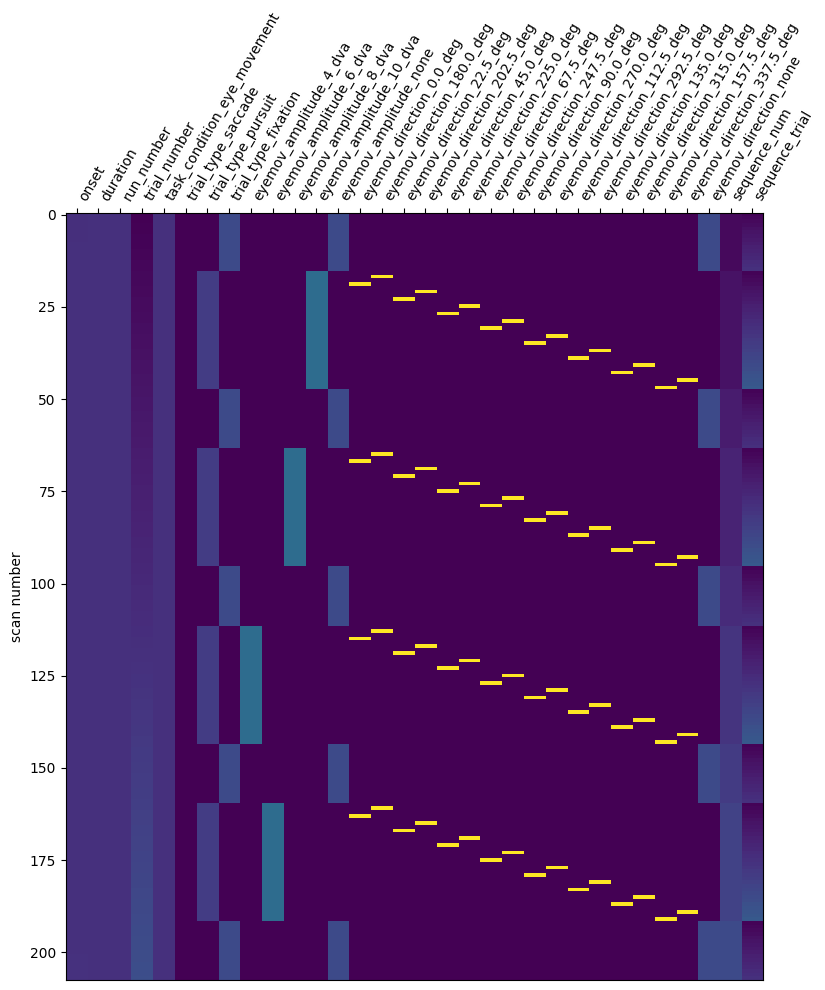

In [3]:
from nilearn.plotting import plot_design_matrix
plot_design_matrix(design_matrix)


In [4]:
print(design_matrix['trial_type_fixation'])

0      1
1      1
2      1
3      1
4      1
      ..
203    1
204    1
205    1
206    1
207    1
Name: trial_type_fixation, Length: 208, dtype: int64
